In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv', sep=',')
print(df.shape)
df.head()

(45211, 18)


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [50]:
# See a summary of our dataframe
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  45211
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :   0

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [51]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [52]:
# Transform 'y' from yes or no to 0s and 1s
df['converted'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)
del df['y']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


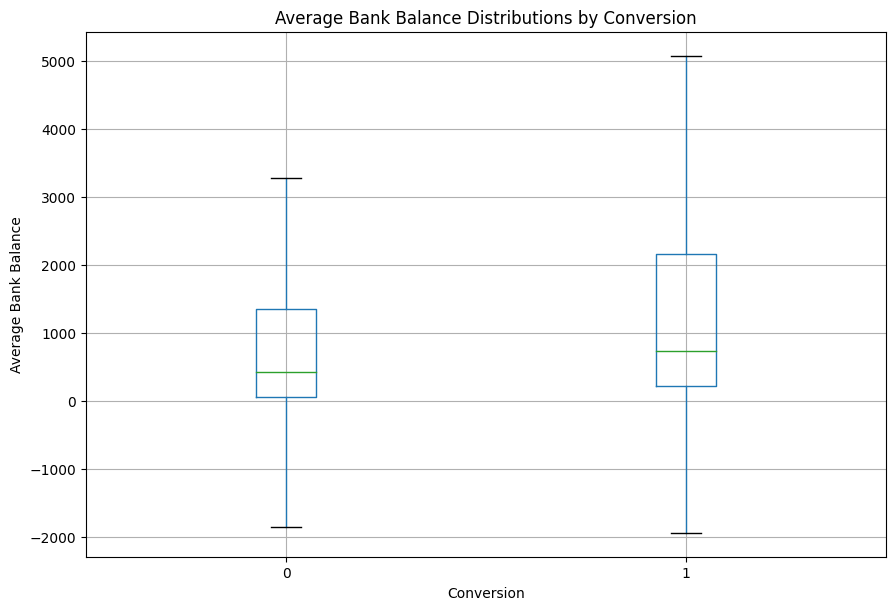

In [53]:
# Visualize how output variable (converted) changes with different incomes
ax = df[['converted', 'balance']].boxplot(by='converted', showfliers=False, figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

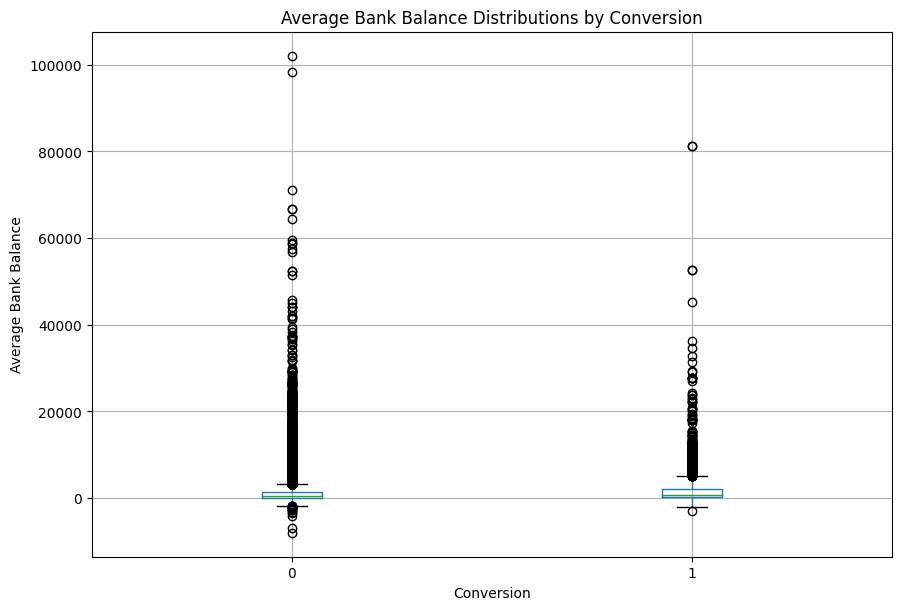

In [54]:
# Visualize how output variable (converted) changes with different incomes
ax = df[['converted', 'balance']].boxplot(by='converted', showfliers=True, figsize=(10, 7))

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

In [55]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [56]:
# Conversion rate by campaign
conversions_by_contacts = df.groupby('campaign')['converted'].sum() / df.groupby('campaign')['converted'].count() * 100.0
# See the top 10 campaigns in terms of % converted
conversions_by_contacts.head(10)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
Name: converted, dtype: float64

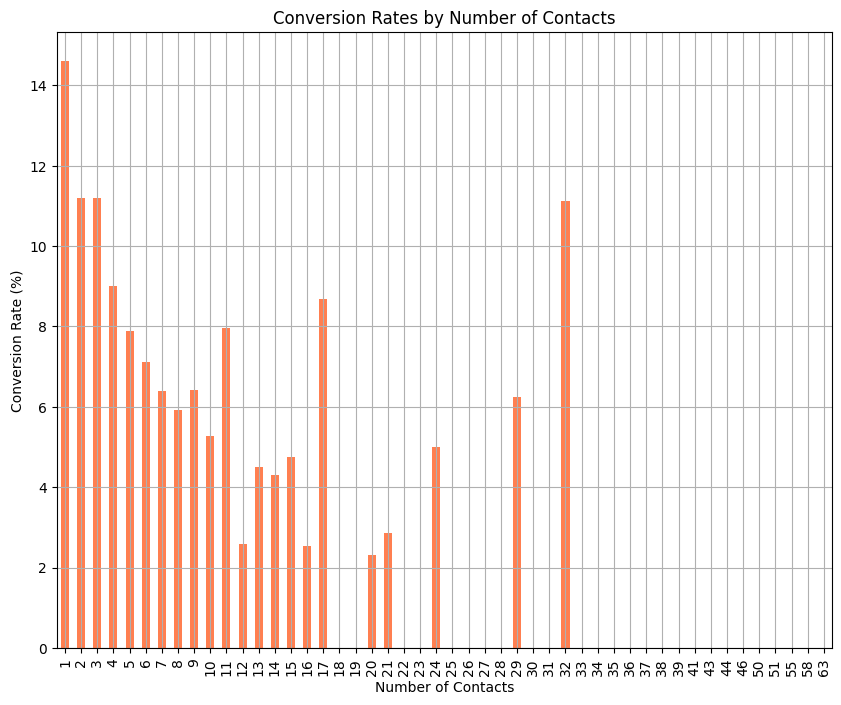

In [57]:
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='coral'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

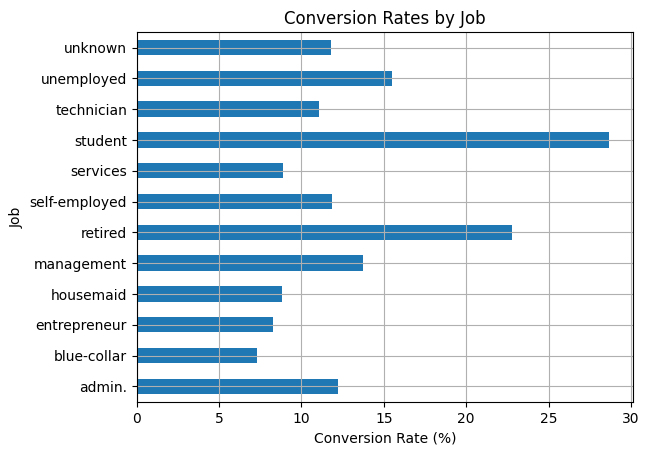

In [58]:
# Conversion rate by job?
conversion_rate_by_job = df.groupby(by='job')['converted'].sum() / df.groupby(by='job')['converted'].count() * 100.0
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.show()

In [59]:
# View the number of unique elements in each feature
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
converted       2
dtype: int64

In [60]:
# Get category type columns
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['job',
 'housing',
 'default',
 'contact',
 'marital',
 'poutcome',
 'loan',
 'month',
 'education']

### ENCODE CATEGORICAL VARIABLES

In [61]:
# Start with month first
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [62]:
df.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [63]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x)+1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [64]:
# Encode Jobs
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [65]:
df = pd.get_dummies(data=df, columns=['job'])
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df = pd.get_dummies(data=df, columns=['marital'])
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [67]:
# Encode Housing
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [68]:
df['housing'] = df['housing'].map(lambda s :1  if s == 'yes' else 0)
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,no,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,no,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [69]:
# Encode Loans
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [70]:
df['loan'] = df['loan'].map(lambda s :1  if s == 'yes' else 0)
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,5,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,5,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,5,198,...,0,0,0,0,0,0,1,0,0,1


In [71]:
# Encode Education
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [72]:
df = pd.get_dummies(data=df, columns=['education'])
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,1,0,unknown,5,5,261,1,...,0,0,0,0,1,0,0,0,1,0
1,44,no,29,1,0,unknown,5,5,151,1,...,1,0,0,0,0,1,0,1,0,0
2,33,no,2,1,1,unknown,5,5,76,1,...,0,0,0,0,1,0,0,1,0,0
3,47,no,1506,1,0,unknown,5,5,92,1,...,0,0,0,0,1,0,0,0,0,1
4,33,no,1,0,0,unknown,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1


In [73]:
# Encode Contact
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [74]:
df = pd.get_dummies(data=df, columns=['contact'])
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,1,0,5,5,151,1,-1,...,0,0,1,0,1,0,0,0,0,1
2,33,no,2,1,1,5,5,76,1,-1,...,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,1,0,5,5,92,1,-1,...,0,1,0,0,0,0,1,0,0,1
4,33,no,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,0,1,0,0,1


In [76]:
# Encode Default
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [77]:
df = pd.get_dummies(data=df, columns=['default'])
df.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,0,0,0,1,1,0
1,44,29,1,0,5,5,151,1,-1,0,...,1,0,1,0,0,0,0,1,1,0
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,1,0,5,5,92,1,-1,0,...,0,0,0,0,1,0,0,1,1,0
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,0,1,0,0,1,1,0


In [78]:
# Encode Outcome
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [79]:
df = pd.get_dummies(data=df, columns=['poutcome'])
df.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,1,1,0,0,0,0,1


In [81]:
# What categoric columns are left?
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [82]:
Y_train = df['converted']
X_train = df.drop(labels = ["converted"], axis = 1)
X_train

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,0,17,11,977,3,-1,0,...,0,1,0,0,1,0,0,0,0,1
45207,71,1729,0,0,17,11,456,2,-1,0,...,0,1,0,0,1,0,0,0,0,1
45208,72,5715,0,0,17,11,1127,5,184,3,...,0,1,0,0,1,0,0,0,1,0
45209,57,668,0,0,17,11,508,4,-1,0,...,0,0,1,0,1,0,0,0,0,1


### FIT DECISION TREE MODEL

In [83]:
from sklearn import tree

dec_tree_model = tree.DecisionTreeClassifier(max_depth=5)

In [84]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [85]:
features = list(X_train.columns)
response_var = 'converted'

In [86]:
features

['age',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'default_no',
 'default_yes',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [87]:
import graphviz

# Export tree to a DOT format is a graphic description language
dot_data = tree.export_graphviz(dec_tree_model, feature_names=features, class_names=['0', '1'],
                                filled=True, rounded=True, special_characters=True)

# Create a visual graph of tree
graph = graphviz.Source(dot_data)

In [88]:
from sklearn.base import clone

def imp_df(column_names, importances):
  df = pd.DataFrame({'feature': column_names,
                     'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
  return df

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [89]:
drop_col_feat_imp(dec_tree_model, X_train, Y_train)

,feature,feature_importance
0,duration,0.009002
1,poutcome_success,0.004711
2,pdays,0.000929
3,month,0.000177
4,marital_married,0.000066
5,day,0.000022
6,job_technician,0.000000
7,education_tertiary,0.000000
8,marital_divorced,0.000000
9,marital_single,0.000000
